In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Markdown

In [18]:
ad = pd.read_csv('facebook_ads_data.csv')
data_ad = pd.DataFrame(ad).drop_duplicates()
data_ad.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [19]:
def fill_missing_values(df):
   # Fills missing values in a DataFrame based on the column data types. Parameters: 
   # df (pd.DataFrame): Input DataFrame. Returns: pd.DataFrame: DataFrame with missing values filled.
 
    for column in df.columns:
        if df[column].dtype == 'object':  # Для строковых колонок
            df[column] = df[column].fillna('')  # Заполняем пустой строкой
        elif np.issubdtype(df[column].dtype, np.number):  # Для числовых колонок
            df[column] = df[column].fillna(0)  # Заполняем нулями
        elif np.issubdtype(df[column].dtype, np.bool_):  # Для булевых колонок
            df[column] = df[column].fillna(False)  # Заполняем False
        elif np.issubdtype(df[column].dtype, np.datetime64):  # Для колонок с датами
            df[column] = df[column].fillna(pd.Timestamp('0000-00-00'))  # Заполняем дефолтной датой
        else:
            df[column] = df[column].fillna(np.nan)  # Для остальных типов заполняем NaN
    
    return df


In [20]:
ad = fill_missing_values(ad)
ad['ad_date'] = pd.to_datetime(ad['ad_date'])
ad.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,0.00,0.00,0.000000,0.000000
1,2022-11-01,Expansion,0.00,0,0,0.00,0.00,0.00,0.000000,0.000000
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


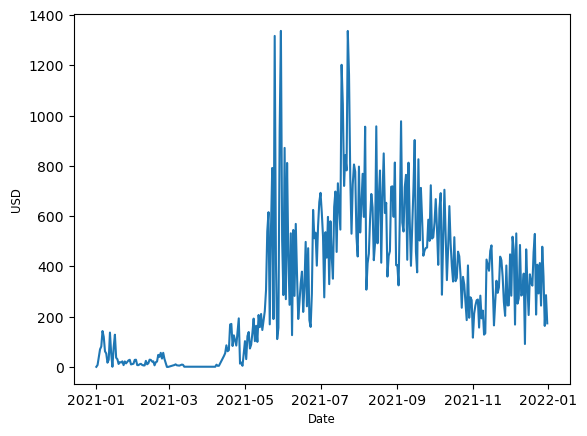

In [21]:
fiter_21 = ad[ad['ad_date'].dt.year == 2021]
spend_21 = fiter_21.groupby('ad_date',as_index=False)[['total_spend','romi']].sum()
plt.plot(spend_21['ad_date'],spend_21['total_spend'])
plt.xlabel('Date',fontsize = 'small')
plt.ylabel('USD',fontsize = 'small')
plt.show()

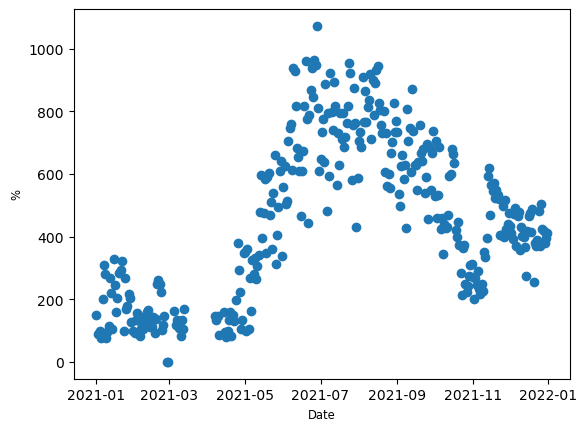

In [22]:
plt.scatter(spend_21['ad_date'],spend_21['romi']*100)
plt.xlabel('Date',fontsize = 'small')
plt.ylabel('%',fontsize = 'small')
plt.show()

In [23]:
spend_21['Rolling_Spend'] = spend_21['total_spend'].rolling(window=2).mean()
spend_21['Rolling_ROMI'] = spend_21['romi'].rolling(window=2).mean()
spend_21

,ad_date,total_spend,romi,Rolling_Spend,Rolling_ROMI
0,2021-01-01,0.39,1.512821,NaN,NaN
1,2021-01-02,7.74,0.891473,4.065,1.202147
2,2021-01-04,70.06,0.977305,38.900,0.934389
3,2021-01-05,81.15,0.760074,75.605,0.868690
4,2021-01-06,142.77,2.022425,111.960,1.391249
...,...,...,...,...,...
324,2021-12-27,478.31,4.236782,361.210,4.642496
325,2021-12-28,359.83,4.178221,419.070,4.207502
326,2021-12-29,163.25,3.790408,261.540,3.984315
327,2021-12-30,285.67,3.962574,224.460,3.876491


In [24]:
# Grouping Data by campaign_name and Plotting Graphs
grouped_data = data_ad.groupby('campaign_name').agg({
    'total_spend': 'sum',
    'romi': 'mean'
}).reset_index()
grouped_data

,campaign_name,total_spend,romi
0,Brand,539.92,1.241293
1,Crazy discounts,2175.29,1.208851
2,Discounts,2856.39,1.247111
3,Electronics,23920.42,1.225274
4,Expansion,67212.82,1.237941
5,Hobbies,11326.97,1.238967
6,Lookalike,63631.09,1.245056
7,New items,2936.97,1.279135
8,Promos,4993.84,1.751932
9,Trendy,1992.31,1.840145


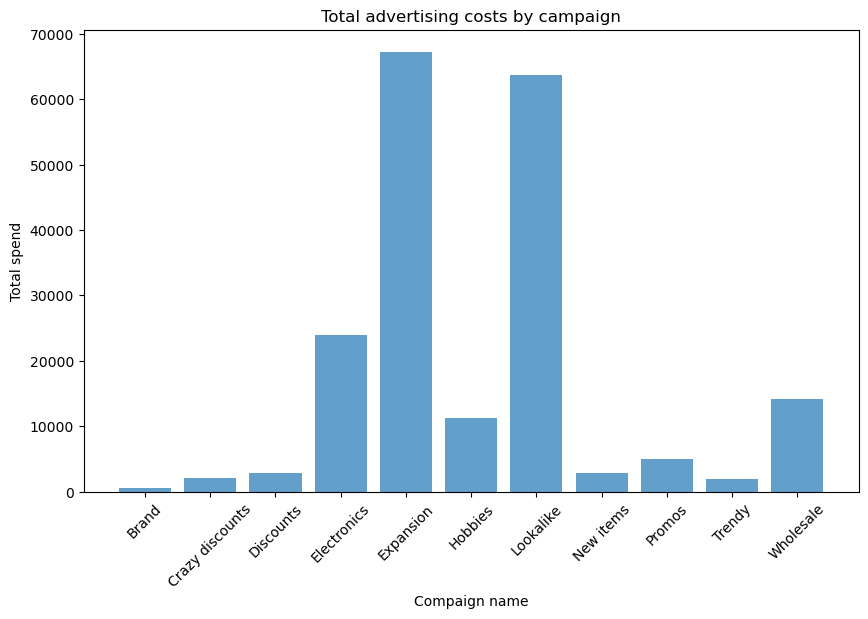

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['campaign_name'], grouped_data['total_spend'], alpha=0.7)
plt.title('Total advertising costs by campaign')
plt.xlabel('Compaign name')
plt.ylabel('Total spend')
plt.xticks(rotation=45)
plt.show()

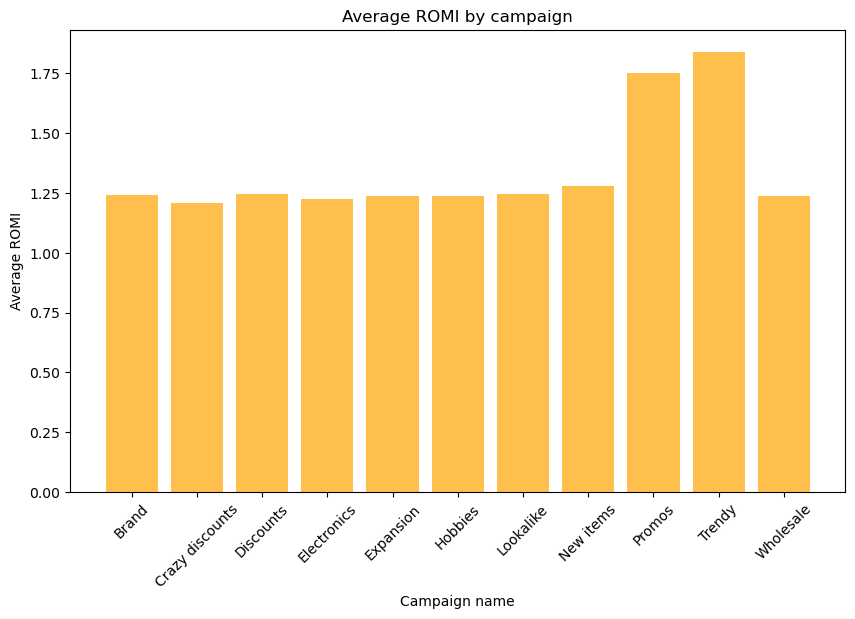

In [26]:
# Average ROMI by Campaigns Chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['campaign_name'], grouped_data['romi'], alpha=0.7, color='orange')
plt.title('Average ROMI by campaign')
plt.xlabel('Campaign name')
plt.ylabel('Average ROMI')
plt.xticks(rotation=45)
plt.show()

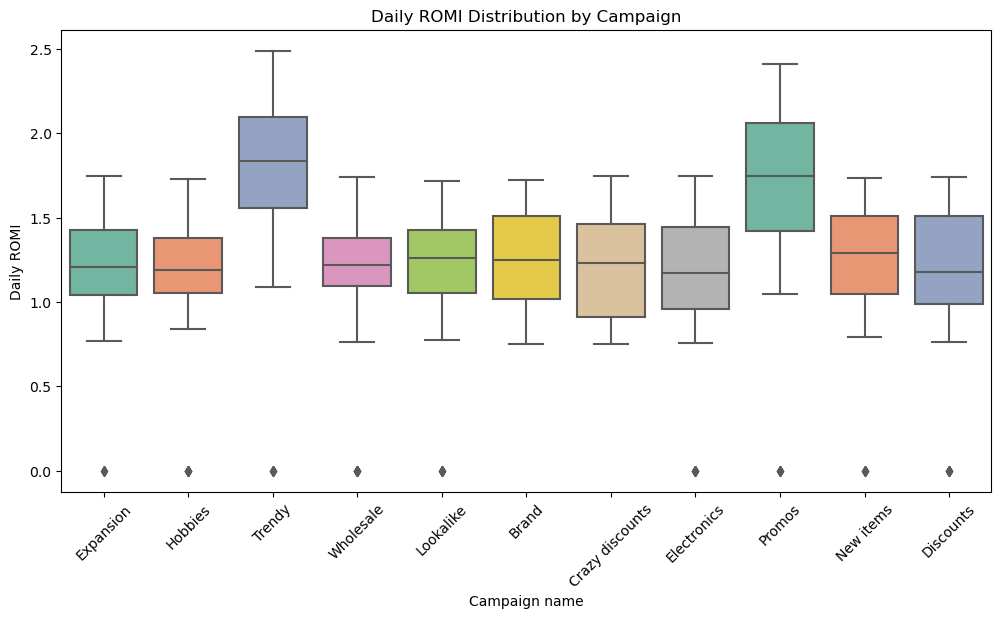

In [27]:
# Box plot for daily ROMI
plt.figure(figsize=(12, 6))
sns.boxplot(data=ad, x='campaign_name', y='romi', palette='Set2')
plt.title('Daily ROMI Distribution by Campaign')
plt.xlabel('Campaign name')
plt.ylabel('Daily ROMI')
plt.xticks(rotation=45)
plt.show()

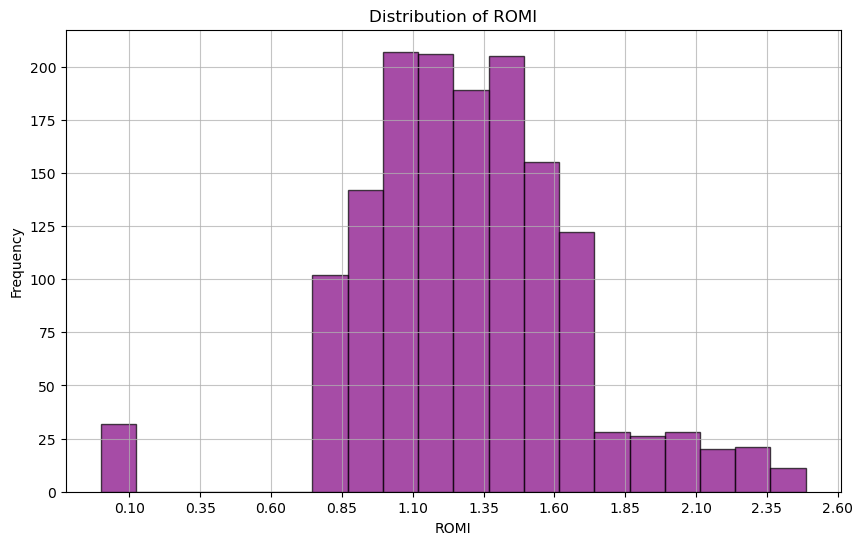

In [28]:
# Histogram for ROMI distribution with correctly adjusted bin sizes on the X-axis
plt.figure(figsize=(10, 6))
plt.hist(ad['romi'].dropna(), bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution of ROMI')
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.grid(axis='both', alpha=0.75)

# Настройка оси X
x_ticks = np.arange(0.1, ad['romi'].max() + 0.25, 0.25)
plt.xticks(x_ticks)

plt.show()


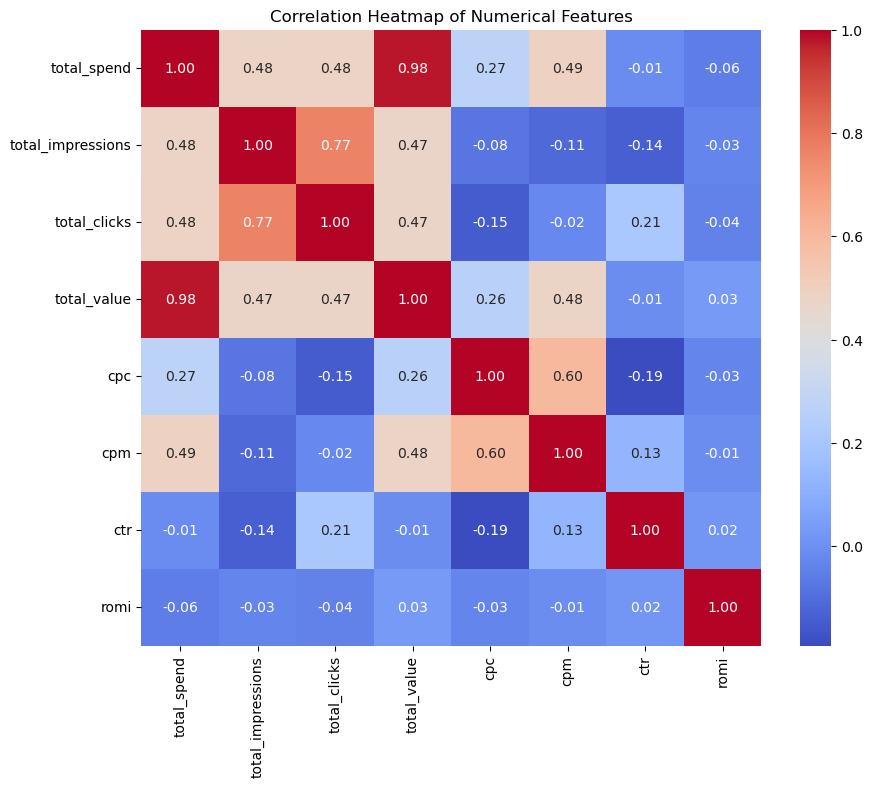

In [29]:
# Heatmap of Correlation
correlation_matrix = ad.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [30]:
# Сorrelation "total_value"
total_value_correlations = correlation_matrix['total_value'].sort_values(ascending=False)
total_spend = total_value_correlations['total_spend']
print("Корреляция с total_value:\n", total_value_correlations)

Корреляция с total_value:
 total_value          1.000000
total_spend          0.978890
cpm                  0.475645
total_clicks         0.472124
total_impressions    0.472037
cpc                  0.258207
romi                 0.032000
ctr                 -0.010272
Name: total_value, dtype: float64


# Results of correlation analysis:

In [31]:
sorted_correlations = correlation_matrix.unstack().sort_values(ascending=False)
highest_correlation = round(sorted_correlations[sorted_correlations < 1.0].iloc[0],3)
lowest_correlation = round(sorted_correlations.iloc[-1],5)
dynamic_markdown = f"""
### Highest correlation: {highest_correlation} between 'total_value' и 'total_spend'.
"""
Markdown(dynamic_markdown)


### Highest correlation: 0.979 between 'total_value' и 'total_spend'.


In [32]:
dynamic_markdown = f"""
### Lowest correlation: {lowest_correlation} between 'ctr' and 'cpc'.
"""
Markdown(dynamic_markdown)


### Lowest correlation: -0.19226 between 'ctr' and 'cpc'.


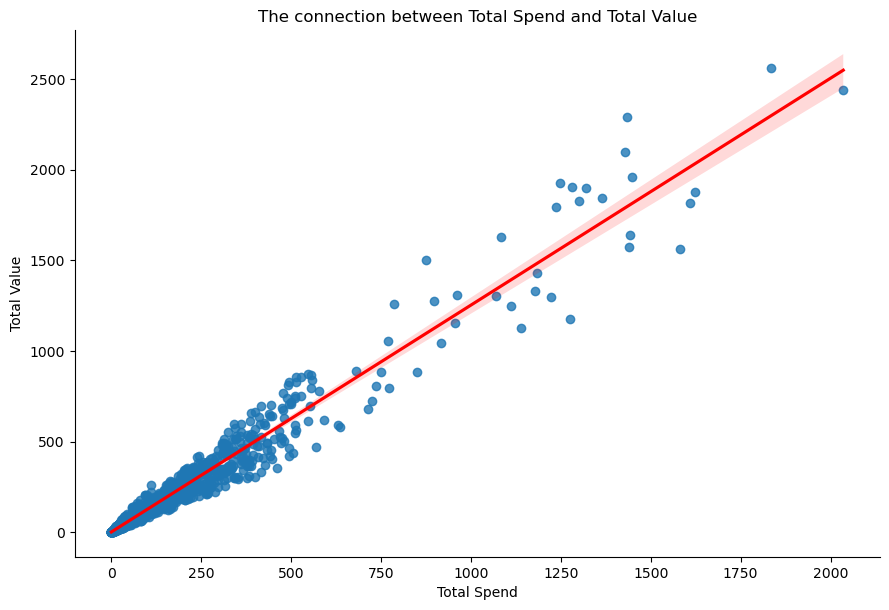

In [33]:
# Scatter Plot with Linear Regression
sns.lmplot(data=ad, x='total_spend', y='total_value', height=6, aspect=1.5, line_kws={'color': 'red'})
plt.title('The connection between Total Spend and Total Value')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.show()